# Asteroid User Guide

The Asteroid programming language is a programming language that makes pattern matching one of its core computational mechanisms.  John Backus identified value-level (object-level) programming languages as programming languages that combine various values to form other values until the final result values are obtained. Virtually all our classic programming languages today including C, C++, and Java belong into this category. Here we identify pattern-level (term-level) programming languages that combine various patterns to form other patterns until the final result patterns are obtained. New patterns are constructed from existing ones by the application of pattern-to-pattern functions exploiting pattern matching and constructors. First-order logic programming languages such as Prolog, OBJ, and Maude belong into this category. Our insight that pattern-level and value-level programming gives rise to a pattern-value duality is used as the foundation of the design of our new programming language called Asteroid. Hallmarks of this new programming language design are the developer’s ability to explicitly control the interpretation or model of expression terms and the notion of ‘patterns as first class citizens’. In addition to a complete implementation of pattern-level programming Asteroid also supports an object-oriented style of programming based on prototypes and also subject to pattern matching.

In this document we describe the major features of Asteroid and give plenty of examples.  For the most part Asteroid should appear very familiar.  However, there are some features which differ drastically from other programming languages.  Here are just two:

1. All assignments are pattern-match statements.  For example if I state,
```
let [x,2,y] = [1,2,3].
```
that means the subject term `[1,2,3]` is matched to the pattern `[x,2,y]` and `x` and `y` are bound to the values 1 and 3, respectively.  By the way, there is nothing wrong with this statement,
```
let [1,2,3] = [1,2,3].
```

2. Asteroid allows for list slicing.  Consider the example,
```
let a = [1,2,3].
let b = a@1. -- access element 1
print b.
```
The result of executing this program would be that the value `2` is printed to the screen.  On the other hand the program,
```
let a = [1,2,3].
let b = a@[1]. -- access element 1 and return it in a list
print b.
```
would print the value `[2]`.  We can take advantage of this capability by reverse the list a with a simple indexing operation,
```
let a = [1,2,3].
let b = a@[2,1,0]. -- reverse list a
print b.
```

Import the Asteroid interpreter so we can run Asteroid programs in this notebook.  Be sure that you are running Jupyter with Python 3.x.

In [1]:
from asteroid_interp import interp 

## The Basics

As most languages we are familiar with Asteroid has **variables** (alpha-numeric symbols starting with an alpha character) and **constants**.  Constants are available in all the **built-in data types**:

* `integer`
* `real`
* `string`
* `boolean`

Asteroid arranges these data types in a **type hierarchy** in order to facilitate automatic type promotion:

`boolean` < `integer` < `real` < `string`

Asteroid supports one more data type that does not really have constants but explicit constructors: 

`list`

The constructor associated with lists is a pair of square brackets as we have seen in the above examples.  But there other ways of constructing a list using constructors,
```
let a = [1,2,3].  -- this is a list
let b = 1,2,3.    -- so is this
let c = (1,2,3).  -- and so is this
```
The lists `a`, `b`, and `c` are all equivalent. 

Lists themselves are also embedded in a **type hierarchy**:

`list` < `string`

That is, any list can be viewed as a string.  This is very convenient for printing lists.

By now you probably figured out that statements are terminated with a period and that comments start with a '`--`' symbol and continue till the end of the line.  You also probably figured out that the `let` statement is Asteroid's version of assignment even though the underlying mechanism is a bit different.

## Data Structures

### Lists

In Asteroid the `list` is the fundamental, built-in data structure.  A trait it shares with programming languages such as Lisp, Python, ML, and Prolog.  Here is that list reversal example from above as an executable Asteroid program. So go ahead and experiment!

In [2]:
program = \
"""
load "standard".    -- load standard computational model
load "io".          -- load the io module so we can print
let a = [1,2,3].    -- construct a list
let b = a@[2,1,0].  -- reverse list a
print b.
"""
interp(program)

[3,2,1]


As we have seen the `@` operator allows you to access either individual elements or slices of a list.  We can also use **list comprehensions** to construct lists,

In [3]:
program = \
"""
load "standard".  -- load standard computational model
load "io".          

-- build a list of odd values
let a = [1 to 10 step 2].
print ("list: " + a).

-- reverse the list
let slice = [4 to 0 step -1].
let b = a@slice.
print ("reversed list: " + b).
"""
interp(program)

list: [1,3,5,7,9]
reversed list: [9,7,5,3,1]


Higher dimensional arrays can easily be simulated with lists of lists,

In [4]:
program = \
'''
load "standard".  -- load standard computational model
load "io".

-- build a 2-D array
let b = [[1,2,3],
         [4,5,6],
         [7,8,9]].
         
-- modify an element in the array
let b@1@1 = 0.
print b.
'''
interp(program)

[[1,2,3],[4,0,6],[7,8,9]]


At this point slicing is not supported on the left side of a `let` statement.

### Custom Data Structures using Constructors

You can introduce custom data structures using **constructors**.  These custom data structures differ from lists in the sense that the name of the constructor acts like a type tag.  So in some sense when you define a new constructor you are introducing a new type into your program.  Here is a simple example,

In [5]:
program = \
'''
load "standard".  -- load standard computational model
load "io".

-- introduce a new type `Person` with arity 3
constructor Person with arity 3.

-- make a list of persons
let people = [
    Person("George", 32, "M"),
    Person("Sophie", 46, "F"),
    Person("Oliver", 21, "M")
    ].

-- retrieve the second person on the list and print
let Person(name,age,sex) = people@1.
print (name + " is " + age + " years old and is " + ("male" if sex is "M" else "female") + ".").
'''
interp(program)

Sophie is 46 years old and is female.


The `constructor` statement introduces a new typed data structure. In this case it introduces a data structure of type `Person` with three "slots".  We use this data structure to build a list of persons.  One of the interesting things in terms of constructors is that we can pattern match the generated data structure as in the `let` statement above.

It turns out that data structures defined with the `constructor` command also support prototype based OO programming.  More of that below.

### Lists as Dictionaries

Dictionaries in Asteroid are implemented as lists of name-value pairs.  Asteroid supports a special dictionary index operator that given a key will return the associated value from the list of key-value pairs.  Here is an example where the list `color_codes` is a list of colors together with their [RGB hex encoding](https://i.pinimg.com/originals/14/dd/c0/14ddc00b5481ddda9244b285e2a0c2ca.jpg).  The program proceeds to ask the user for a color name and uses the `@{<key>}` dictionary index operator to retrieve the encoding for the given color, 

In [6]:
program =\
'''
load "standard".
load "io".

-- color to hex conversion dictionary
let color_codes = [
    ("red", "FF,00,00"),
    ("green", "00,FF,00"),
    ("yellow", "FF,FF,00")
    ].
    
let color = input("Enter a color: ").
print ("The RGB encoding for the color " + color + " is " + color_codes@{color}).
'''
interp(program)

Enter a color: red
The RGB encoding for the color red is FF,00,00


If a color name is specified by the user that is not in the dictionary an exception is thrown.

## The Let Statement

The `let` statement is Asteroid's assignment statement.  Here is a snippet of Asteroid's grammar detailing the statement,
```
stmt := LET pattern '=' exp '.'?
```
In the grammar capital words and symbols in quotes represent language keywords.  Lower case letter represent non-terminals in the grammar.  

The notation is an EBNF notation that means the question mark is a meta operator and makes the period at the end of the `let` statement optional.  Even though the period is optional we highly recommend using it because leaving it out can, under certain circumstances, lead to ambiguous statements and therefore will lead to syntax errors.

As we said before, the `let` statement is a pattern matching statement which we can see expressed here by the `pattern` to the left side of the `=` sign. Patterns are expressions that consist purely of constructors and variables. Under the **standard computational model** constructors consist of constants, list constructors, and user defined constructors.  Under the **default model** any expression symbol that has not been attached to a function can be used for pattern matching.

Here is an example under the **standard computational model**,

In [7]:
program =\
"""
load "standard".
load "io".

let [x,2,y] = [1+0,1+1,1+2].
print (x,y).
"""
interp(program)

[1,3]


Here is a similar program under the **default model**,

In [8]:
program =\
"""
load "default".
load "io".

let [x,1+1,y] = [1+0,1+1,1+2].
print (x,y).
"""
interp(program)

[__plus__([1,0]),__plus__([1,2])]


Under the default model all expression symbols are constructors unless a function has been attached to them.  Here the `+` symbol is considered a constructor since under the default model it has no other interpretation.  This has consequence for the "value 2" part of the pattern in the `let` statement - here we have to match the explicit structure of `1 + 1` since the `1 + 1` on the righ side is not evaluated but represents a structure.  The same is true with the values `1 + 0` and `1 + 2`.  Each of these terms represent structure and this structure is bound to the corresponding variable in the pattern during matching.  This becomes clear when we print out the bound values of the variables: they are just prefix term structures (`__plus__` is Asteroid's internal representation of the `+` operator symbol).

## Flow of Control Statements

Control structure implementation in Asteroid is along the lines of any of the modern programming languages such as Python, Swift, or Rust.  For example, the `for` loop allows you to iterate over lists without having to explicitly define a loop index counter.  Here is a snippet from the Asteroid EBNF grammar that shows the control statements,
```
stmt := FOR pattern IN exp DO stmt_list END FOR
      | WHILE exp DO stmt_list END WHILE
      | REPEAT stmt_list UNTIL exp '.'?
      | IF exp DO stmt_list (ELIF exp DO stmt_list)* (ELSE DO? stmt_list)? END IF
      | TRY stmt_list (CATCH pattern DO stmt_list)+ END TRY
      | THROW exp '.'?
      | BREAK '.'?
```
Looking at the list of supported flow of control statements there are really not a lot of surprises.  For example, here is a short program with `for` loop that prints out the first ten even positive integers,

In [9]:
program =\
"""
load "standard".
load "io".
for i in 0 to 10 step 2 do
    print i
end for
"""
interp(program)

0
2
4
6
8
10


Here is another example that iterates over lists,

In [10]:
program = \
"""
load "standard".
load "io".

for bird in ["turkey","duck","chicken"] do
    print bird.
end for
"""
interp(program)

turkey
duck
chicken


Even though Asteroid's flow of control statements look so familiar they support pattern matching to a degree not found in other programming languages and which we will take a look at below.

## Functions

Here is the grammar snippet that defines functions,
```
stmt      := FUNCTION ID body_defs END FUNCTION
body_defs := WITH pattern DO stmt_list (ORWITH pattern DO stmt_list)*
```
A closer look reveals that a function can have multiple bodies each associated with a difference formal argument pattern.  Asteroid inherits this characteristic directly from the functional languages like ML or Haskell.

However, considering that a variable represents the simplest pattern we can write functions that look very familiar to the programmer coming from the Python or Java traditions.  Here is a function that reverses a list,

In [11]:
program =\
'''
load "standard".
load "util".
load "io".

function reverse with list do
    let len = length(list).
    let r_list = list@[(len-1) to 0 step -1].
    return r_list.
end function

let my_list = [1,2,3].
let my_reversed_list = reverse(my_list).
print my_reversed_list.
'''
interp(program)

[3,2,1]


We'll talk about pattern matching in functions and multiple bodies later on in this document.  Asteroid also supports anonymous or `lambda` functions.  Here is a snippet of the grammar that defines anonymous functions,
```
primary := LAMBDA body_defs 
```
where the `body_defs` are the same as for the functions defined above.  This implies that `lambda` functions can also have multiple bodies each associated with a different formal argument pattern.  Here is a simple example using a `lambda` function,

In [12]:
program = \
'''
load "standard"
load "io".

print ((lambda with n do return n+1) 1).
'''
interp(program)

2


## Manipulating the Model

One of the most unconventional features of Asteroid is the fact that the developer has the ability to control the interpretation or model of the expression operator symbols such as `+` and `*`, *etc.*. We start by demonstrating how a developer can explicitly manipulate the interpretation of the `+` and `-` operators,

In [13]:
program =\
"""
load "io". 

-- print out the value using the default term model
load "default".
print (4+3-2). 

-- print out the value using the standard model
load "standard". 
print (4+3-2). 

-- save the interpretations
let plus_op = __plus__.
let minus_op = __minus__.

-- detach the interpretations from constructors
detach from __plus__.
detach from __minus__.

-- reattach in opposite order
attach plus_op to __minus__.
attach minus_op to __plus__. 

-- print the value of the term using
-- the modified standard model
print (4+3-2). 
"""
interp(program)

__minus__([__plus__([4,3]),2])
5
3


This program prints out the value of the term `4 + 3 - 2` under three different interpretations:

* Under the default term model 

* Under the standard model 

* Under the standard model with the interpretations for `+` and `-` swapped

Here the symbols `__plus__` and `__minus__` are the internal names of the corresponding operators.
As we can see the program generates the following output:
```
__minus__([__plus__([4,3]),2])
5
3
```
The first line is the output under the term model and shows a dump of the internal term structure of the expression `4 + 3 - 2` in prefix format.
The second line is the output under the standard model.  Given the usual interpretation of `+` and `-` the expression `4 + 3 - 2` evaluates to the value 5.
The third line shows the output under the modified standard model with the interpretation of `+` and `-`
swapped. In this case the expression `4 + 3 - 2` evaluates to the value 3.

The following program shows another example of model manipulation

In [14]:
program = \
"""
load "standard".
load "io".
    
attach (lambda with a,b do return a*b) to __plus__.
print (3+2).
"""
interp(program)

6


Here we attach a lambda function that computes the product of its arguments as the interpretation of the `+` operator symbol.  The output of this program under this modified model is the value 6 rather than the expected value 5.

## Basic Pattern Matching

Pattern matching lies at the heart of Asteroid and the ability of manipulating the interpretation of expression terms allows the developer to pattern match on operator symbols usually reserved for value computations.  We saw some of Asteroid's pattern match ability when we discussed the `let` statement.  Below is another program that highlights a few other aspects of pattern matching.
In particular, quoted expressions allows the programmer to treat expressions as constructor terms in the presence of a model other than the default model and pattern match against that structure.  Quoted expressions can be interpreted in the current model using the `eval` function as shown in the following.

In [15]:
program =\
"""
load "standard".
load "io".
load "util".

let 1 + 1 = '1 + 1. -- quoted expression
let 2 = eval('1 + 1). 
let 2 = 1 + 1.
try
    let 1 + 1 = 1 + 1.  -- throws an exception
catch _ do
    print "pattern match failed".
end try
"""
interp(program)

pattern match failed


Asteroid supports pattern matching on function arguments in the style of ML and many other functional programming languages.
Below is a quick sort implemented in Asteroid as an example of this classic style pattern matching.  What is perhaps new is the `head-tail` operator being used in the last `orwith` clause.  Here the variable `pivot` matches the first element of the list and the variable `rest` matches the remaining list which is the original list with its first element removed.  We can  also see that the `+` operator symbols has been overloaded in the standard model to act as a list concatenation operator. 

In [16]:
program =\
"""
load "standard".
load "io".

function qsort
    with [] do
        return [].
    orwith [a] do
        return [a].
    orwith [pivot|rest] do 
        let less=[].
        let more=[].
        
        for e in rest do
            if e < pivot do
                let less = less + [e].
            else
                let more = more + [e].
            end if
        end for
        
        return qsort less + [pivot] + qsort more.
    end function
    
-- print the sorted list
print (qsort [3,2,1,0])
"""
interp(program)

[0,1,2,3]


We can also introduce our own custom constructors and use them in pattern matching.  The program below implements [Peano addition](https://en.wikipedia.org/wiki/Peano_axioms\#Addition) on terms using the two Peano axioms,
```
x + 0 = x
x + S(y) = S(x+y)
```
Here `x` and `y` are variables, `0` represents the natural number with value zero, and `S` is the successor function.  In Peano arithmetic any natural number can be represented by the appropriate number of applications of the successor function to the natural number `0`. Here is the program, 

In [17]:
program =\
"""
load "io".

constructor S with arity 1.

function reduce
    with x + 0 do
        return reduce(x).
    orwith x + S(y) do
        return S(reduce(x + y)).
    orwith term do
        return term.
    end function

print(reduce(S(S(0))+S(S(S(0))))). 
"""
interp(program)

S(S(S(S(S(0)))))


Our program defines the constructor `S` to represent the successor function. Next, it defines a function that uses pattern matching to identify the left sides of the two axioms.  If either one pattern matches the input to the `reduce` function it will activate the corresponding function body and rewrite the term recursively in an appropriate manner.  We have one additional pattern which matches if neither one of the Peano axiom patterns matches and terminates the recursion.  Finally,  on the last line, we use our `reduce` function to compute the Peano term for the addition of 2 + 3. As expected, the output of this program is,
```
S(S(S(S(S(0)))))
```
Observe that due to the fact that here we operate only in Asteroid's default term model, the `+` operator symbol was available to us as a constructor which allowed us to write the Peano addition in a very natural style.

## Pattern Matching in Control Structures

Before we begin the discussion we need to introduce the `is` predicate  which is a built-in operator that takes the pattern on the right side and applies it to the subject term on the left side.  If there is a match the predicate will return `true` if not then it will return `false`.  Here is a snippet that illustrates the predicate,
```
let true = 1 + 2 is x + y.
``` 
The subject term `1 + 2` is matched to the pattern `x + y` which of course will succeed with the variable bindings $\mbox{x} \mapsto 1$ and $\mbox{y} \mapsto 2$.

### Pattern Matching in `if` Statements 

In Asteroid an `if` statement consists of an `if` clause followed by zero or more `elif` clauses followed by an optional `else` clause.  The semantics of the `if` statement is fairly standard.  The `if` and `elif` clauses test the value of their corresponding expressions for the term `true` and execute their corresponding set of statements if it does evaluate to `true`.  If none of the expressions evaluate to `true` then the `else` clause is executed if present.

In order to enable pattern matching in `if` statements we use the `is` predicate.  We can rewrite the `reduce` function from above Peano arithmetic example using pattern matching in `if` statements as an illustration,
```
function reduce
    with term do
        if term is x + 0 do
            return reduce(x).
        elif term is x + S(y)  do
            return S(reduce(x + y)).
        else do
            return term.
        end if
    end function
```
One thing to note is that the variable bindings of a successful pattern match are immediately available in the corresponding statements of the `if` or 'elif` clause.

### Pattern Matching in `while` Loops

Pattern matching in `while` loops follows a similar approach to pattern matching in `if` statements.  The `while` statement tests the evaluation of the loop expression and if it evaluates to the term `true` then the loop body is executed.  Again we use the `is` predicate to enable pattern matching in `while` loops.

The example below shows a program that employs pattern matching using the head-tail operator in the `while` expression in order to iterate over a list and print the list elements.  Note that the `if` statement in the loop body is necessary because applying the head-tail operator to an empty list throws an exception.  

In [18]:
program =\
'''
load "io".

let list = [1,2,3].

while list is [head|tail] do
    print head.
    let list = tail.
    if list is [] do 
        break.
    end if
end while
'''
interp(program)

1
2
3


### Pattern Matching in `for` Loops 

In addition to the canonical examples we have looked at above we can expand the loop variable into a pattern and do pattern matching while we are iterating.  This allows us to access substructures of the items being iterated over in a direct and succinct way.  The example below shows such a program.  The program constructs a list of `Person` structures that consist of a name and an age.  The `for` loop iterates over this list while pattern matching the `Person` constructor at each iteration binding the age variable to the appropriate value in the structure.  In the loop body it carries a running sum of the age values which it then uses to compute the average age of the persons on the list.  

In [19]:
program =\
'''
load "standard".
load "io".
load "util".

constructor Person with arity 2.

let people = [ 
    Person("George", 32),
    Person("Sophie", 46),
    Person("Oliver", 21)
    ].
    
let n = length people.
let sum = 0.

for Person(_,age) in people do 
    let sum = sum + age.
end for

print ("Average Age: " + (sum/n)). 
'''
interp(program)

Average Age: 33


We can also use pattern matching on the index variable of a `for` loop to select certain items from a list. Suppose we extend the `Person` structure of the program with an additional field capturing the sex of a person.  The program below does just that.  That additional field is then used by the `for` loop to select only male members on the list and print out their names,

In [20]:
program =\
'''
load "io".

constructor Person with arity 3.

let people = [
    Person("George", 32, "M"),
    Person("Sophie", 46, "F"),
    Person("Oliver", 21, "M")
    ].
    
for Person(name,_,"M") in people do 
    print name.
end for
'''
interp(program)

George
Oliver


### Pattern Matching in `try-catch` Statements

Excpetion handling in Asteroid is very similar to exception handling in many of the other modern programming language available today.  The example below shows an Asteroid program that performs basic exception handling.  It attempts a division by zero which will throw an exception.  The exception is caught by the `catch` clause  and its value printed to the terminal.  

In [21]:
program =\
'''
load "io".
load "standard".

try
let i = 10/0. 
    print i.
catch e do 
    print e. 
end try
'''
interp(program)

[Exception,integer division or modulo by zero]


By default, exceptions in Asteroid are pairs where the first component is an exception specifier and the second component is the value of the exception. In Asteroid we can pattern match on the structure of exceptions in the `catch` clause.  The example below shows the same program from above where the `catch` clause  has been modified to match the structure on the exception explicitly.  Here we pattern match on the exception specifier and print out the value of the exception.  

In [22]:
program =\
'''
load "io".
load "standard".

try
    let i = 10/0.
    print i.
catch ("Exception", v) do 
    print v.  
end try
'''
interp(program)

integer division or modulo by zero


The structure of the exceptions as shown in the previous examples are by convention only and all internally generated exceptions in Asteroid follow that convention.  However, there is nothing to prevent the user to create his or her own exception structures and objects and pattern match on them in  `catch` clauses.  The example below shows a program that throws an exception using the `MyException` constructor.  That exception structure is pattern matched in the `catch` clause and its value is printed to the terminal.  

In [23]:
program =\
'''
load "io".

constructor MyException with arity 1.

try
    throw MyException("Hello There!").
catch MyException(v) do
    print v. 
end try
'''
interp(program)

Hello There!


## Object-Oriented Programming and Pattern Matching

We introduce Asteroid's objects using the dog example from the [Python documentation](https://docs.python.org/3/tutorial/classes.html).  The code below shows that Python example translated into Asteroid.  Asteroid's object system is prototype based.  In Asteroid it is the convention that object members are given as name-value pairs.  That also includes function members in addition to data members.  In our example we define our prototype object with three members: two data members, `"name"` and `"tricks"` and one function `"add_trick"`.  Object members are accessed in Asteroid's dictionary style syntax.  What makes this truly object-oriented is the fact that when an object function is accessed in the context of a function call, like do `fido@{"add_trick"}("roll over").`, Asteroid generates an implicit object reference as the first argument to the called function.  Notice that at the call site  we only provide a single arguments whereas the function definition has two arguments; the first one capturing the object reference.


In [24]:
program = \
'''
load "standard".
load "io".
load "util".

constructor Dog with arity 3.

-- assemble the prototype object
let dog_proto = Dog ( 
  ("name", ""),  
  ("tricks", []),
  ("add_trick", 
     lambda
       with (self,new_trick) do
         let self@{"tricks"} =
           self@{"tricks"}+[new_trick])).

-- Fido the dog
let fido = copy dog_proto.  -- instantiate fido from prototype
let fido@{"name"} = "Fido".

-- use function 'add_trick' to add tricks to the object
fido@{"add_trick"}("roll over").
fido@{"add_trick"}("play dead").

-- Buddy the dog
let buddy = copy dog_proto.  -- instantiate buddy from prototype
let buddy@{"name"} = "Buddy".

-- use function 'add_trick' to add tricks to the object
buddy@{"add_trick"}("roll over").
buddy@{"add_trick"}("sit stay").

-- print out the tricks
print ("Fido's tricks: " + fido@{"tricks"}).
print ("Buddy's tricks: " + buddy@{"tricks"}).
'''
interp(program)

Fido's tricks: [roll over,play dead]
Buddy's tricks: [roll over,sit stay]


In order to demonstrate pattern matching with object we added a third dog and added a list of dogs to our program. The resulting program below shows this and we also added code that iterates over the list of the dogs and prints out the names of the dogs whose first trick is `roll over`.  The filtering of the objects on the list is done via pattern matching on the loop variable.

In [25]:
program =\
'''
load "standard".
load "io".
load "util".

constructor Dog with arity 3.

-- assemble the prototype object
let dog_proto = Dog (
  ("name", ""),
  ("tricks", []),
  ("add_trick",
     lambda
       with (self,new_trick) do
         let self@{"tricks"} =
           self@{"tricks"}+[new_trick])).

-- Fido the dog
let fido = copy dog_proto.
let fido@{"name"} = "Fido".

fido@{"add_trick"} "roll over".
fido@{"add_trick"} "play dead".

-- Buddy the dog
let buddy = copy dog_proto.
let buddy@{"name"} = "Buddy".

buddy@{"add_trick"} "roll over".
buddy@{"add_trick"} "sit stay".

-- Fifi the dog
let fifi = copy dog_proto.
let fifi@{"name"} = "Fifi".

fifi@{"add_trick"} "sit stay".

-- print out all the names of dogs
-- whose first trick is 'roll over'.
let dogs = [fido, buddy, fifi]. 

for Dog(("name",name),  
        ("tricks",["roll over"|_]),
        _) in dogs do
  print (name + " does roll over").
end for
'''
interp(program)

Fido does roll over
Buddy does roll over


Pattern matching on objects is straight forward due to the fact that objects like other structures consist of nested constructors.  This also includes function constructors.  In Asteroid function constructors are purely syntactic in nature. Asteroid does not compute any function closures and therefore only supports dynamic scoping.  This makes sense in an enviroment where patterns as first class citizens  are also dynamically scoped objects. 

There is an elegant way of rewriting the last part of the code of the above example using the fact that in Asteroid patterns are first class citizens.  In the program below we associate our pattern with the variable `dog`. The quote at the beginning of the pattern is necessary otherwise Asteroid will try to dereference the variable `name` as well as the anonymous variables `_`. We use the pattern associated with `dog` in the `for` loopin order to filter the objects on the list. The `*` operator is necessary in order to tell Asteroid to use the pattern associated with the variable `dog` rather than using the variable itself as a pattern.

In [26]:
program =\
'''
load "standard".
load "io".
load "util".

constructor Dog with arity 3.

-- assemble the prototype object
let dog_proto = Dog (
  ("name", ""),
  ("tricks", []),
  ("add_trick",
     lambda
       with (self,new_trick) do
         let self@{"tricks"} =
           self@{"tricks"}+[new_trick])).

-- Fido the dog
let fido = copy dog_proto.
let fido@{"name"} = "Fido".

fido@{"add_trick"} "roll over".
fido@{"add_trick"} "play dead".

-- Buddy the dog
let buddy = copy dog_proto.
let buddy@{"name"} = "Buddy".

buddy@{"add_trick"} "roll over".
buddy@{"add_trick"} "sit stay".

-- Fifi the dog
let fifi = copy dog_proto.
let fifi@{"name"} = "Fifi".

fifi@{"add_trick"} "sit stay".

-- print out all the names of dogs whose first trick is 'roll over'.
-- we start by putting all our dogs on a list
let dogs = [fido, buddy, fifi]. 

-- define our pattern
let dog = 'Dog( 
  ("name",name),
  ("tricks",["roll over"|_]), -- head-tail op applied to tricks
  ("add_trick",_)).

-- iterate over dogs applying our pattern
-- only if the pattern match is successful will the loop body be executed
for *dog in dogs do 
  print (name + " does roll over").
end for
'''
interp(program)

Fido does roll over
Buddy does roll over


## Patterns as First Class Citizens

We have shown in the above program that patterns can be associated with and dereferenced from variables.  The program below illustrates that we can also pass patterns to functions where they can be used for pattern matching.  Here we define a function `match` that expects a subject term and a pattern.  It proceeds to pattern match the subject term to the pattern using the `is` predicate and returns whatever the predicate returns.  Observe the `*` operator in front of the `pattern` variable stating that we want to use the pattern associated with that variable.  In the program we call the function `match` with subject term `1+1` and pattern `_+_`.  

In [27]:
program =\
'''
load "io".

function match with subject, pattern do
    return subject is *pattern.
end function
    
print (match(1+1, '_+_)). 
'''
interp(program)

true


We can also construct patterns on-the-fly as shown below.  Here we construct two subpatterns `cl` and `cr`.  These two subpatterns are used to construct the full pattern `p` when the pattern is evaluated during a pattern match. Finally, we check whether our pattern is assembled correctly on last line.  The output of the program is `true` meaning our pattern has the same structure as the subject term `1+2+3`.

In [28]:
program =\
'''
load "io".

let cl = '1 + 2. 
let cr = '3.
let p = '*cl + *cr.

print (1+2+3 is *p).
'''
interp(program)

true


A couple of observations:

* The quotes in the definitions of the subpatterns are not strictly necessary  because we are working in the default term model and the subpatterns do not contain any variables.

* The quote in the definision of the pattern `p` is necessary because we don't want to evaluate the dereference operator `*` at this point.

* From this example it is obvious that patterns with dereference operators are dynamically scoped structures.  The variables `cl` and `cr` in pattern `p` will capture their closest associations when the pattern is evaluated during a pattern match as on the last line.

With Asteroid's ability to manipulate patterns we can rewrite the program from above implementing Peano addition.  In the rewritten version the pertinent Peano axioms are stored as rules in a rule table which the program will access during execution.  The example below shows the rewritten program.  Our two Peano axioms appear as rules in the rule table.  Note that each rule is written as a pair where the first component is the left side of the corresponding rule and the second component is the right side of the corresponding rule.  The left sides of the rules represent the patterns that need to match the subject term and therefore it is not surprising that they are written as quoted expressions.  We also need to write the right sides of the rules as quoted expressions because we want to delay their evaluations until their corresponding patterns have matched an appropriate subject term.

The function `reduce` searches through the rule table for a match to the current subject term `term`.  If a match is found the corresponding right side of the rule is evaluated.  If no match is found then the term is returned unmodified.  The output of the program is of course the Peano term `S(S(S(S(S(0)))))`.

In [29]:
program =\
'''
load "standard".
load "util".
load "io".

detach from __plus__ . -- '+' is now a constructor
constructor S with arity 1.

let rule_table = [ 
    ('x + 0,    'reduce(x)), 
    ('x + S(y), 'S(reduce(x + y))) 
    ].

function reduce with term do
    for i in 0 to length(rule_table) - 1 do
        let (lhs, rhs) = rule_table@i.
        if term is *lhs do
            return eval(rhs).
        end if
    end for
    return term.
end function

print (reduce('S(S(0)) + S(S(S(0))))).
'''
interp(program)

S(S(S(S(S(0)))))


Observe that the variables of the right sides of the rules in the rule table do not need to be preceeded by a `*` dereference operator because we are not in a pattern matching context.  There is no ambiguity here on how a variable should be interpreted -- it is always to be dereferenced.

This example demonstrates that Asteroid's ability to manipulate both its model  and patterns  allows pattern-level programming (*e.g.* the rule table and `for` loop body) to coexist seamlessly with value-level programming (*e.g.* the `for` loop expression).

## Advanced Model Manipulation

Here we look at a couple of examples involving interesting aspects of model manipulation in Asteroid. The first program shows how straight forward it is to switch between pattern- and value-level programming in Asteroid.  We define a constructor `S` and an increment function `inc`.  We then continue to print out the value of the term `S(S(S(0)))` which will print exactly the same way on the output because `S` is a constructor. Next, we attach the `inc` function as an interpretation to the constructor `S`. We then continue to print out the value of the same term `S(S(S(0)))`. However, now `S` has an interpretation as an increment function so the value printed to the output is the value three.  Next,  we detach the `inc` function from the constructor and then print the same term again.  Since at this point `S` is again just a constructor the output generated is `S(S(S(0)))`.

In [30]:
program =\
'''
load "standard".
load "io".

constructor S with arity 1.

function inc with n do
    return 1 + n.
end function

-- switch back and forth between pattern- and value-level programming
print (S(S(S(0)))).

attach inc to S. 
print (S(S(S(0)))).

detach from S. 
print (S(S(S(0)))). 
'''
interp(program)

S(S(S(0)))
3
S(S(S(0)))


In the next example we show that models do not always have to be value-oriented.  Instead we can interpret one structure with another.  Observe that in this example we do not load the standard model and only work in the default term model.  We  define our by now familiar constructor `S` and an increment function `inc` . Because we did not load the standard model the `inc` function returns a structure rather than a value (`+` is treated as a constructor).  We print out the interpretation of the term structure `S(S(S(0)))` which under the default term model is just the structure `S(S(S(0)))`.  Next we attach the function `inc` as an interpretation to the constructor `S`. We again print out the interpretation of term `S(S(S(0)))`.  In this case, because `S` now has an interpretation, the value is the structure,
```
__plus__([1,__plus__([1,__plus__([1,0])])])
```
Here we can see that we interpreted one structure with another. 

In [31]:
program =\
'''
load "io".

constructor S with arity 1.

function inc with n do
    return 1 + n.
end function

print (S(S(S(0)))).

attach inc to S. 
print (S(S(S(0)))).
'''
interp(program)

S(S(S(0)))
__plus__([1,__plus__([1,__plus__([1,0])])])


Over the course of the previous discussions we have seen plenty of instances where we replaced one Asteroid model with another by using the appropriate `attach` and `detach` commands to manipulate the interpretation of constructors.  What is perhaps not so obvious is that we can also create overloaded models, that is, models where constructors have more than one interpretation. The example below shows a program that creates an overloaded model for the `*` operator.  Here we start by loading the standard model.  Note that in the standard model the interpretation for the `*` operator is the `mult_op` function from the `math` module.  Next we define a function that recursively computes the dot product of two vectors.  We define the function `mult_op_overloaded` that will serve as the new interpretation for the `*` operator.  This function performs one of two computations depending on the type of its arguments.  If the arguments are vectors/lists then it will compute the dot product of the two vectors otherwise it will compute the multiplication of two scalars using the `mult_op` function.  We replace the original interpretation of the `*` operator with our new overloaded model by first detaching the original interpration and then attaching our new interpretation.  Observe that this new model preserves the original interpration of the `*` operator if the arguments are not vectors.  

In [32]:
program =\
'''
load "math". -- defines mult_op
load "standard".
load "io".
load "util".

function dot_op 
    with [a],[b] do
        return mult_op(a,b).
    orwith [h1|t1],[h2|t2] do
        return mult_op(h1,h2) + dot_op(t1,t2).
    end function
    
function mult_op_overloaded
    with v1,v2 do
        if is_list(v1) and is_list(v2) do
            -- one interpretation
            return dot_op(v1,v2).
        else do
            -- another interpretation
            return mult_op(v1,v2).
        end if
    end function

detach from __times__. 
attach  mult_op_overloaded to __times__. 

print ("[2,2,2]*[2,2,2]="+[2,2,2]*[2,2,2]).
print ("2*2=" + 2*2).
'''
interp(program)

[2,2,2]*[2,2,2]=12
2*2=4


## Escaping Asteroid

The Asteroid interpreter is written in Python and the `escape` expression gives the user full access to the Python ecosystem from within Asteroid code.  In particular it gives the user access to the intperpreter internals making it easy to write interpreter extensions.  The following example shows one way to incorporate graphics into Asteroid programs,

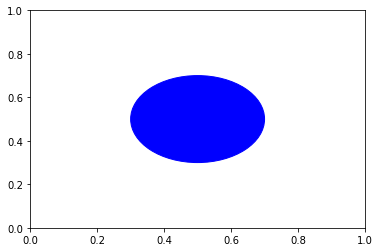

In [33]:
program = \
'''
function circle with x, y, r do escape
"
# get the function parameters from the symbol table
vx = float(state.symbol_table.lookup_sym('x')[1])
vy = float(state.symbol_table.lookup_sym('y')[1])
vr = float(state.symbol_table.lookup_sym('r')[1])

# plot the circle at (vx,vy) with radius vr
import matplotlib.pyplot as plt

circle = plt.Circle((vx, vy), vr, color='blue')
fig, ax = plt.subplots()
ax.add_artist(circle)
plt.show()
"
end function

-- call the escaped function
circle(.5, .5, .2)
'''
interp(program)

Asteroid's `math` module is implemented using escaped code.  For example addition is implemented with the following function,

In [34]:
program =\
'''
function add_op with a, b do return escape 
"
global __retval__ # Asteroid return value register
from asteroid_support import promote
from asteroid_support import term2string
from asteroid_state import state

# lookup the function parameters
val_a = state.symbol_table.lookup_sym('a')
val_b = state.symbol_table.lookup_sym('b')

# do the apropriate type promitions for the addition operator
type = promote(val_a[0], val_b[0])

# overloaded addition
if type in ['integer', 'real', 'list', 'boolean']:
    __retval__ = (type, val_a[1] + val_b[1])

elif type == 'string':
    __retval__ = (type, term2string(val_a) + term2string(val_b))

else:
    raise ValueError('unsupported type {} in +'.format(type))
"     
end function

load "io".
print (add_op(1, 2.1)).
'''
interp(program)

3.1


This function nicely highlight how to use some of the internals of the Asteroid interpreter in order to implement arithmetic operations.  Note that values are returned from escaped code via the `__retval__` register.

## Asteroid I/O

The Asteroid I/O module currently implements three functions:

**Print** is a function that prints its argument in a readable from to the terminal.  Remember that under the standard model the `+` operator implements string concatenation.  This allows us to construct nicely formatted output strings,

In [35]:
program =\
'''
load "standard".
load "io".
let a = 1.
let b = 2.
print ("a + b = " + (a + b)).
'''
interp(program)

a + b = 3


**Input** is a function that given a prompt string will prompt the user at the terminal and return the input value as a string.  Here is a small example,

In [36]:
program =\
'''
load "standard".
load "io".
let name = input("What is your name? ").
print ("Hello " + name + "!").
'''
interp(program)

What is your name? Fred
Hello Fred!


We can use the type casting functions such as `integer` or `real` to convert the string returned from `input` into a numeric value,

In [37]:
program =\
'''
load "standard".
load "io".
load "util".

let i = integer(input("Please enter a positive integer value: ")).
for k in 1 to i do
    print k.
end for
'''
interp(program)

Please enter a positive integer value: 5
1
2
3
4
5


**Raw_print** is a function similar to **print** except that it outputs Asteroid's internal term structure for the given argument,

In [38]:
program =\
'''
load "standard".
load "io".
let a = 1.
let b = 2.
raw_print ("a + b = " + (a + b)).
'''
interp(program)

('string', 'a + b = 3')


Try the above program with the `standard` model commented out.  In that case none of the `+` operation will be performed because here `+` is now considered purely a constructor.

## The Module System

A module in Asteroid is simply a file with a set of valid Asteroid statements.  You can include this file into other Asteroid code with the `load "<filename>".` statement.  In the current version of Asteroid modules do not have a separate name space, symbols from a module are entered into Asteroid's global name space.

The search strategy for a module to be loaded is as follows,
1. raw module name - could be an absolute path
1. search in current directory (path[1])
1. search in directory where Asteroid is installed (path[0])
1. search in subdirectory where Asteroid was started


## Running the Asteroid Interpreter

In this document we exeruted the Asteroid interpreter directly via the `interp` function.  However, you can also run the interpreter from the command line.  The file `asteroid` is an appropriate wrapper for the `interp` function so that it can be called from the command line.  On MacOS and Linux this looks something like this if you have the location for the `asteroid` file included in your `PATH` environment variable,

```
$ cat simple.ast
-- a simple program using lambda functions

load "standard"
load "io".

print ((lambda with n do return n+1) 1).
$ 
$ asteroid simple.ast 
2
$ 
```

## Installation

Installation on Unix-like systems is nothing more than to either download or clone the [Asteroid github repository](https://github.com/lutzhamel/asteroid) or download one of the prepackaged releases and add the root directory of the repository/release to your `PATH` environment variable.  Be sure that you have Python 3.x installed.